## Case Study on Probability for Data Science

Problem Statement:

#### To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.

(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

#### Attribute Information:
* cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
* cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
* cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,
red=e, white=w, yellow=y
* bruises: bruises=t, no=f
* odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,
pungent=p, spicy=s
* gill-attachment: attached=a, descending=d, free=f, notched=n
* gill-spacing: close=c, crowded=w, distant=d
* gill-size: broad=b, narrow=n
* gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o,
pink=p, purple=u, red=e, white=w, yellow=y
* stalk-shape: enlarging=e, tapering=t
* Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r,
missing=?
* stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
* stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
* stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,
pink=p, red=e, white=w, yellow=y
* stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,
pink=p, red=e, white=w, yellow=y
* veil-type: partial=p, universal=u
* veil-colour: brown=n, orange=o, white=w, yellow=y
* ring-number: none=n, one=o, two=t
* ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,
sheathing=s, zone=z
* spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,
purple=u, white=w, yellow=y
* population: abundant=a, clustered=c, numerous=n, scattered=s, several=v,
solitary=y
* habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,
woods=d 

In [1]:
#Import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the Dataset

In [2]:
data=pd.read_csv("mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#Changing the column names by adding a " _ " in place of a "-"  
for col in data.columns:
    if '-' in col:
        data = data.rename(columns={col:col.replace('-','_')})
        
#Renaming the 'class column as 'class_ep' since class is a python keyword       
data.rename(columns = {'class':'class_ep'}, inplace = True)

In [4]:
data.head()

,class_ep,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Basic Understanding of the Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class_ep                  8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [6]:
data.describe()

,class_ep,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
data.shape

(8124, 23)

In [8]:
data['class_ep'].value_counts()

e    4208
p    3916
Name: class_ep, dtype: int64

### Inference

* Dataset contains non null values.So we don't need to do any missing value imputation.
* Dataset contains 8124 rows i.e instances of mushrooms and 23 columns with specifications.
* There are 4208 occurences of edible mushrooms and 3916 of poisonous mushrooms in the dataset.
* Dataset is categorical.

## Exploratory Data Analysis

D:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


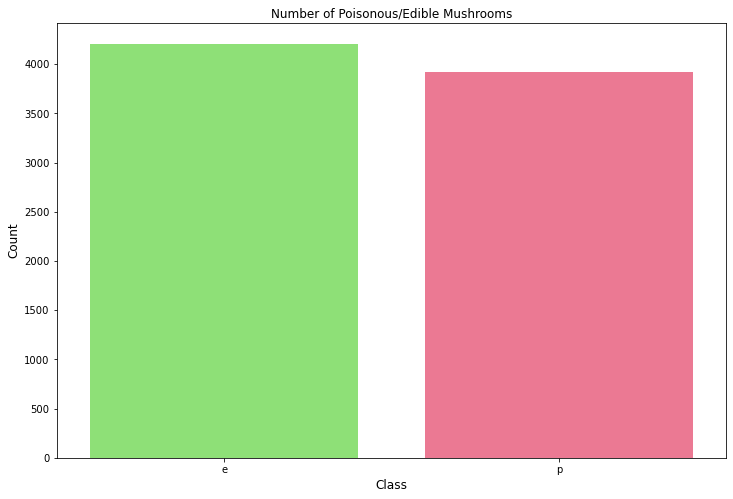

In [9]:
count=data['class_ep'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(count.index,count.values,alpha=0.6,palette='prism')
plt.ylabel("Count",fontsize=12)
plt.xlabel("Class",fontsize=12)
plt.title("Number of Poisonous/Edible Mushrooms")
plt.show()

* There are 4208 occurences of edible mushrooms and 3916 of poisonous mushrooms in the dataset. 

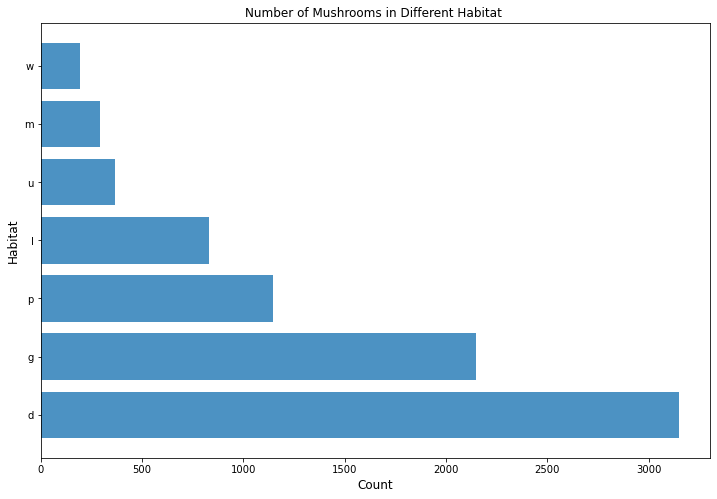

In [10]:
count=data['habitat'].value_counts()
plt.figure(figsize=(12,8))
plt.barh(count.index,count,alpha=0.8)
plt.ylabel("Habitat",fontsize=12)
plt.xlabel("Count",fontsize=12)
plt.title("Number of Mushrooms in Different Habitat ")
plt.show()

* Mushrooms are mostly found on woods and grasses.
* Mushrooms are rarely grown in waste,meadows and urban.

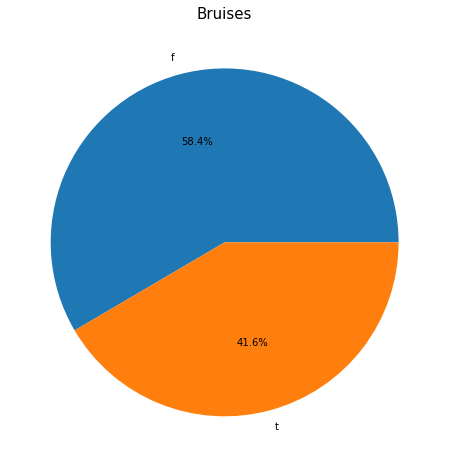

In [11]:
plt.figure(figsize=(10,8))
plt.pie(data['bruises'].value_counts(),labels=data['bruises'].value_counts().keys(),autopct='%1.1f%%')
plt.title('Bruises', fontsize= 15)
plt.show()

* More than half of Mushrooms doesn't contain Bruises.
* Around 41.6% Mushroooms are found with Bruises.

In [12]:
data.dtypes

class_ep                    object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object

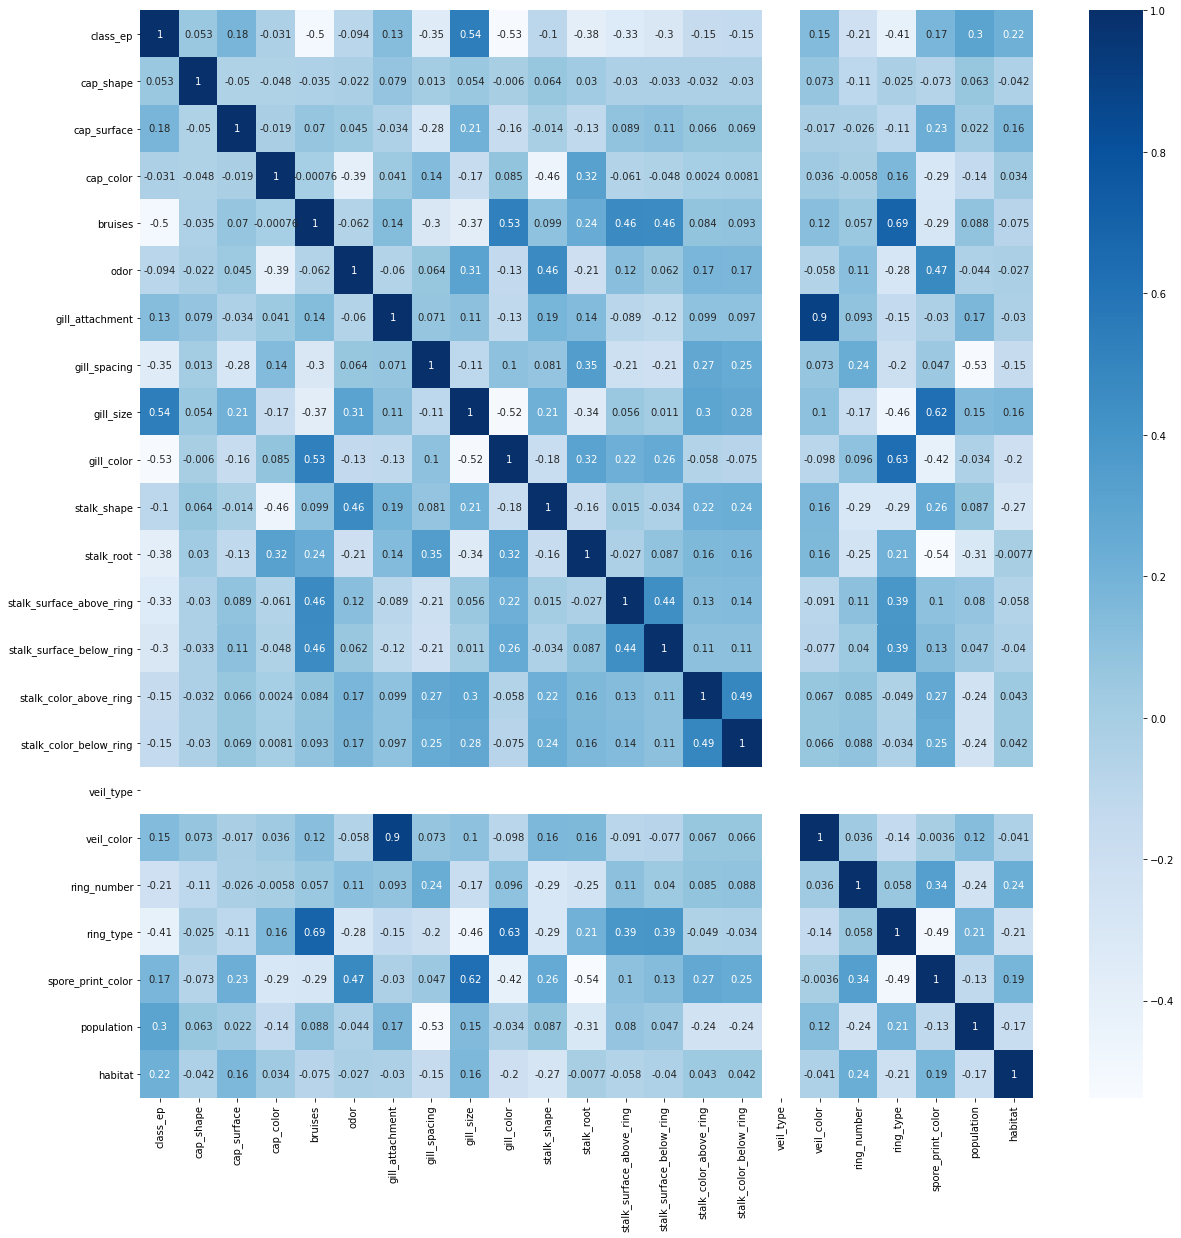

In [16]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = "Blues")
plt.show()

## Data Preprocessing

In [14]:
#Converting categorical data into ordinal data 
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
for column in data.columns:
    data[column]=labelencoder.fit_transform(data[column])

In [15]:
data.head()

,class_ep,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [17]:
data['veil_type'].value_counts()

0    8124
Name: veil_type, dtype: int64

In [18]:
data.drop('veil_type',axis=1,inplace=True)

* The column veil_type is "0" and not contributing to the data, so we dropped the column.

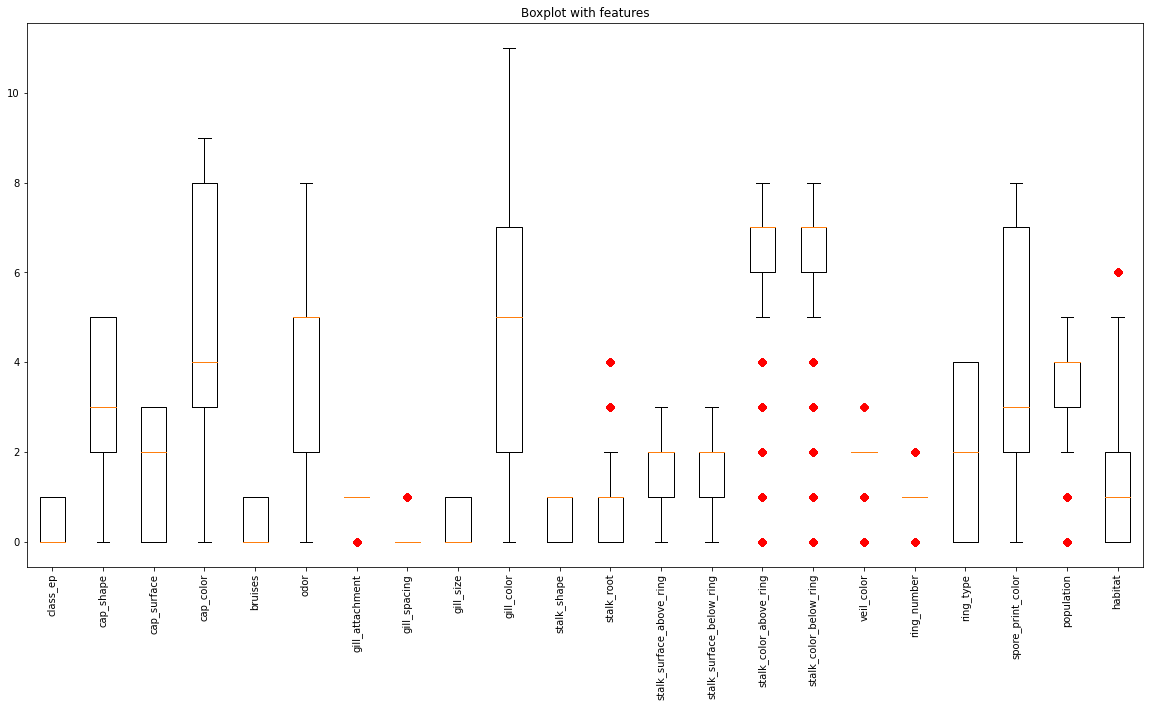

In [19]:
ls_features = list(data.keys())

plt.figure(figsize=(20, 10))
plt.title('Boxplot with features')
plt.boxplot(data.values, 0, 'rD', labels = ls_features)
plt.xticks(rotation = 90)

plt.show()

In [21]:
#list of columns
cols = list(data)
print(cols)

['class_ep', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']


In [22]:
#Splitting into feature set & class labels
X=data.drop('class_ep',axis=1)
Y=pd.DataFrame(data['class_ep'])

In [23]:
#Splitting the dataset into the training set and test set.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

## 1.Naive Bayes Classification

### Gaussian Naive Bayes

In [24]:
#Fitting Gaussian Naive Bayes to the Training Set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,Y_train)

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [25]:
#Prediction of the test set result
Y_pred=classifier.predict(X_test)
Y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [26]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[958,  82],
       [ 67, 924]], dtype=int64)

In [27]:
accuracy_score(Y_test,Y_pred)

0.9266371245691778

In [28]:
print("Test Accuracy: {}%".format(round(classifier.score(X_test,Y_test)*100,2)))

Test Accuracy: 92.66%


### Bernoulli Naive Bayes

In [29]:
#Fitting Bernoulli Naive Bayes to the training set
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(X_train,Y_train)

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BernoulliNB()

In [30]:
#Prediction of the test set result
Y_pred=nb.predict(X_test)
Y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [31]:
print("Test Accuracy: {}%".format(round(nb.score(X_test,Y_test)*100,2)))

Test Accuracy: 84.44%


## 2.Logistic Regression Classification

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="newton-cg")
lr.fit(X_train,Y_train)

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(solver='newton-cg')

In [33]:
#Prediction of the test set result
Y_pred=lr.predict(X_test)
Y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [34]:
print("Test Accuracy: {}%".format(round(lr.score(X_test,Y_test)*100,2)))

Test Accuracy: 95.08%


## 3.KNN Classification

In [35]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score=0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    if knn.score(X_test,Y_test) > best_score:
        best_score = knn.score(X_train,Y_train)
        best_Kvalue = i
print("""Best KNN Value: {}
Test Accuracy: {}%""".format(best_Kvalue, round(best_score*100,2)))

D:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

Best KNN Value: 1
Test Accuracy: 100.0%


## 4.Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [37]:
#Prediction of the test set result
Y_pred=dt.predict(X_test)
Y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [38]:
print("Test Accuracy: {}%".format(round(dt.score(X_test,Y_test)*100,2)))

Test Accuracy: 100.0%


## 5.SVM Classification

In [39]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train,Y_train)

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(gamma='auto', random_state=42)

In [40]:
#Prediction of the test set result
Y_pred=svm.predict(X_test)
Y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [41]:
print("Test Accuracy: {}%".format(round(svm.score(X_test,Y_test)*100,2)))

Test Accuracy: 100.0%


## 6.Random Forest Classification

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,Y_train)

<ipython-input-42-a8311af39c91>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier(random_state=42)

In [43]:
#Prediction of the test set result
Y_pred=svm.predict(X_test)
Y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [44]:
print("Test Accuracy: {}%".format(round(rf.score(X_test,Y_test)*100,2)))

Test Accuracy: 100.0%


## Result

In [56]:
print("Test Accuracy of Guassian Naive Bayes: {}%".format(round(classifier.score(X_test,Y_test)*100,2)))
print("Test Accuracy of Bernoulli Naive Bayes: {}%".format(round(nb.score(X_test,Y_test)*100,2)))
print("Test Accuracy of Logistic Regression: {}%".format(round(lr.score(X_test,Y_test)*100,2)))
print("Best KNN Value: {} Test Accuracy of KNN Model: {}%".format(best_Kvalue, round(best_score*100,2)))
print("Test Accuracy of Decision Tree Classification: {}%".format(round(dt.score(X_test,Y_test)*100,2)))
print("Test Accuracy of SVM Model: {}%".format(round(svm.score(X_test,Y_test)*100,2)))
print("Test Accuracy of Random Forest Classification: {}%".format(round(rf.score(X_test,Y_test)*100,2)))

Test Accuracy of Guassian Naive Bayes: 92.66%
Test Accuracy of Bernoulli Naive Bayes: 84.44%
Test Accuracy of Logistic Regression: 95.08%
Best KNN Value: 1 Test Accuracy of KNN Model: 100.0%
Test Accuracy of Decision Tree Classification: 100.0%
Test Accuracy of SVM Model: 100.0%
Test Accuracy of Random Forest Classification: 100.0%


## Conclusion

* We got 100% Accuracy in following  4 models 
  * 1. KNN Model
  * 2. Decision Tree Classification 
  * 3. SVM Model
  * 4. Random Forest Classification
* We can predict whether the mushroom is edible or poisonous with these models. 
  